**Assignment 5 - Multi-Linear Regression model**

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
data=pd.read_csv("/content/50_Startups.csv")

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Removing state column,as it doesn't contribute to the prediction

In [7]:
data=data.drop('State', axis = 1)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


Renaming lenghty column names to shorter one

In [8]:
data1= data.rename({'R&D Spend':'RD','Administration':'AD','Marketing Spend':'MKT'},axis=1)
data1.head()

,RD,AD,MKT,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


Check for duplicate values and dropping if present

In [ ]:
data1[data1.duplicated(keep=False)]

In [10]:
d1=data1.drop_duplicates()

In [11]:
d1.shape

(50, 4)

Checking outliers using boxplot

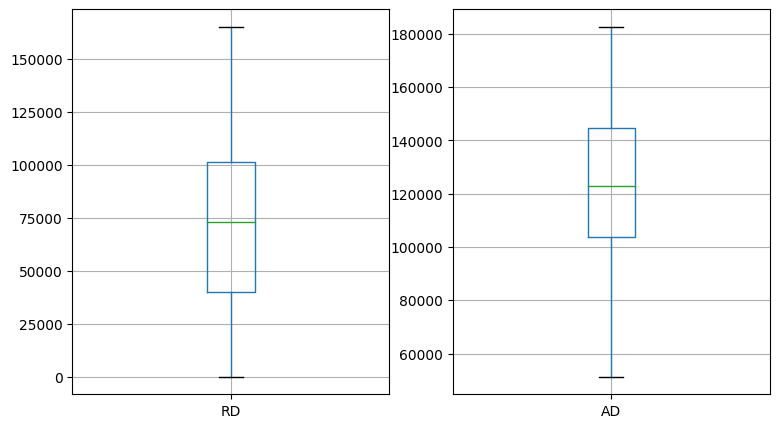

In [13]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
d1.boxplot(column=['RD'])
plt.subplot(1,2,2)
d1.boxplot(column=['AD'])
plt.show()


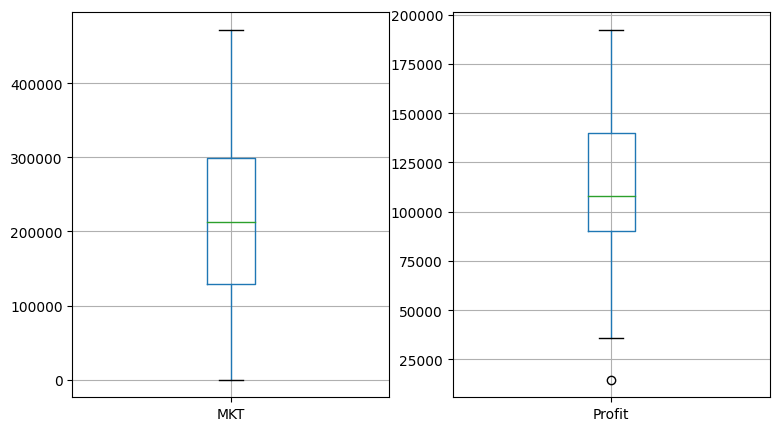

In [14]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
d1.boxplot(column=['MKT'])
plt.subplot(1,2,2)
d1.boxplot(column=['Profit'])
plt.show()

Checking the distribution of data

<ipython-input-21-2a6605433746>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1['RD'])
<ipython-input-21-2a6605433746>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1['AD'])


<Axes: xlabel='AD', ylabel='Density'>

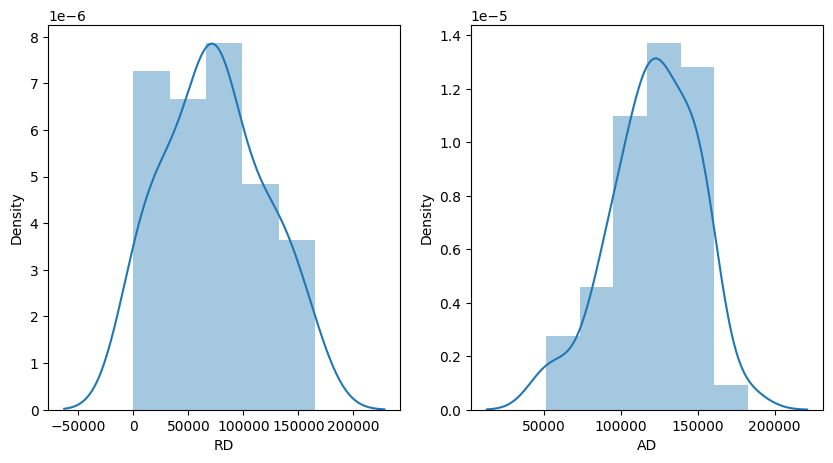

In [21]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(d1['RD'])
plt.subplot(1,2,2)
sns.distplot(d1['AD'])


<ipython-input-22-b250ba73bdca>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1['MKT'])
<ipython-input-22-b250ba73bdca>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1['Profit'])


<Axes: xlabel='Profit', ylabel='Density'>

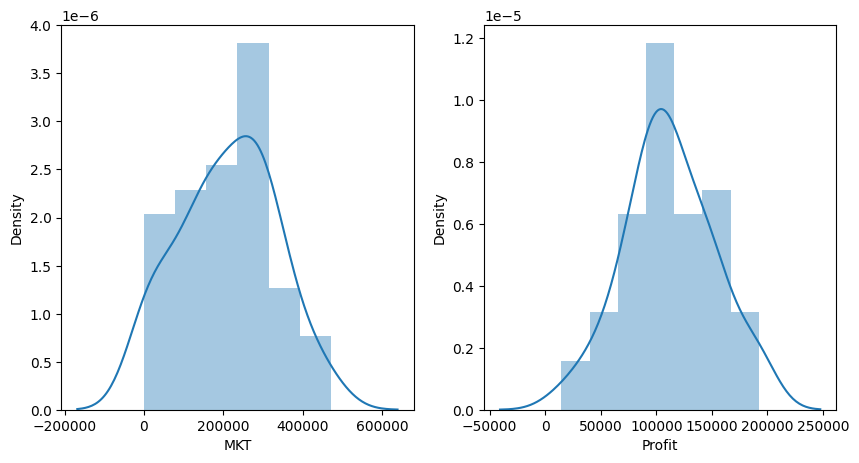

In [22]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(d1['MKT'])
plt.subplot(1,2,2)
sns.distplot(d1['Profit'])

Correlation check

In [23]:
d1.corr()

,RD,AD,MKT,Profit
RD,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Using Pairplot

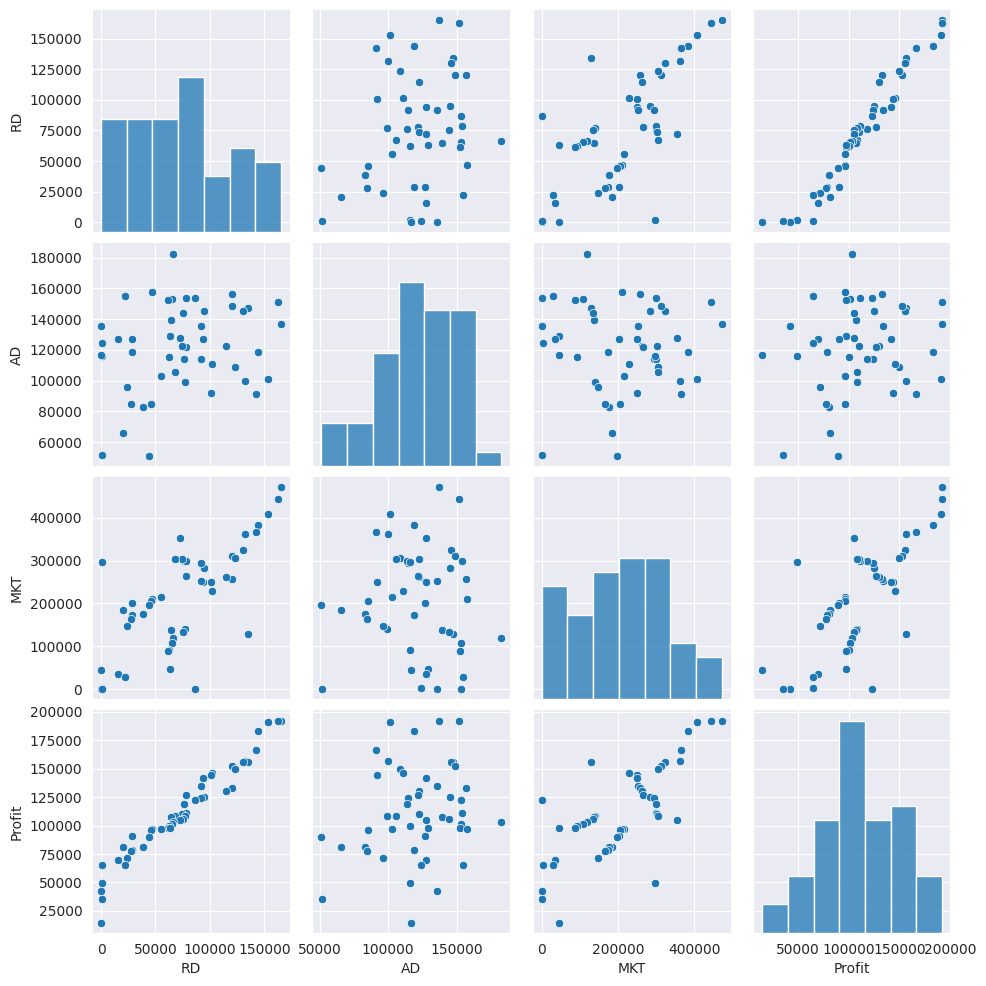

In [24]:
sns.set_style(style='darkgrid')
sns.pairplot(d1)

**Building a Model**

Model 1 

In [25]:
m1 = smf.ols('Profit~RD+AD+MKT',data=d1).fit()

In [26]:
m1.params

Intercept    50122.192990
RD               0.805715
AD              -0.026816
MKT              0.027228
dtype: float64

In [27]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        08:40:45   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKT            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

T and P values

In [28]:
(m1.tvalues,'\n',m1.pvalues)

(Intercept     7.626218
 RD           17.846374
 AD           -0.525507
 MKT           1.655077
 dtype: float64,
 '\n',
 Intercept    1.057379e-09
 RD           2.634968e-22
 AD           6.017551e-01
 MKT          1.047168e-01
 dtype: float64)

In [29]:
pred1=m1.predict(d1)
pred1

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [30]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [31]:
R1=sqrt(mean_squared_error(pred1,d1.Profit))
R1

8855.344489015142

Residual Analysis

1) Normality check 
2) Homoscedasticity check

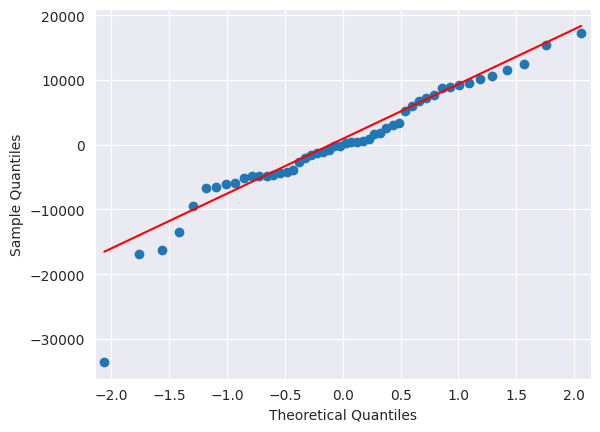

In [32]:
plot=sm.qqplot(m1.resid,line='q')
plt.show()

To get the index values of data points looking from graph

In [33]:
list(np.where(m1.resid<-20000))

[array([49])]

In [34]:
def get_standardized_values(R):
    return (R-R.mean())/R.std()

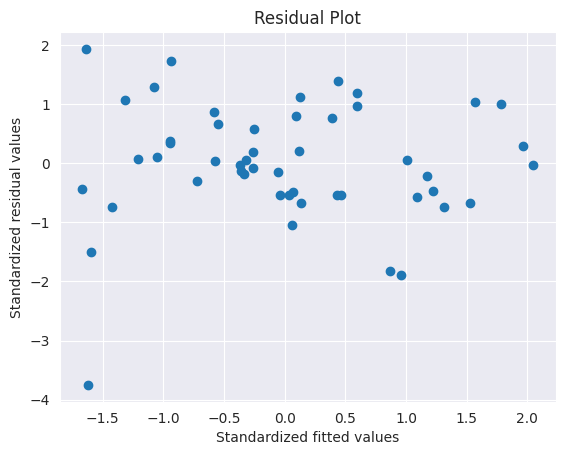

In [35]:
plt.scatter(get_standardized_values(m1.fittedvalues),get_standardized_values(m1.resid))
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.title('Residual Plot')
plt.show()

Detecting influencer points or influencers - Cook's distance

In [37]:
m1_influencer=m1.get_influence()

In [38]:
(A,_)=m1_influencer.cooks_distance

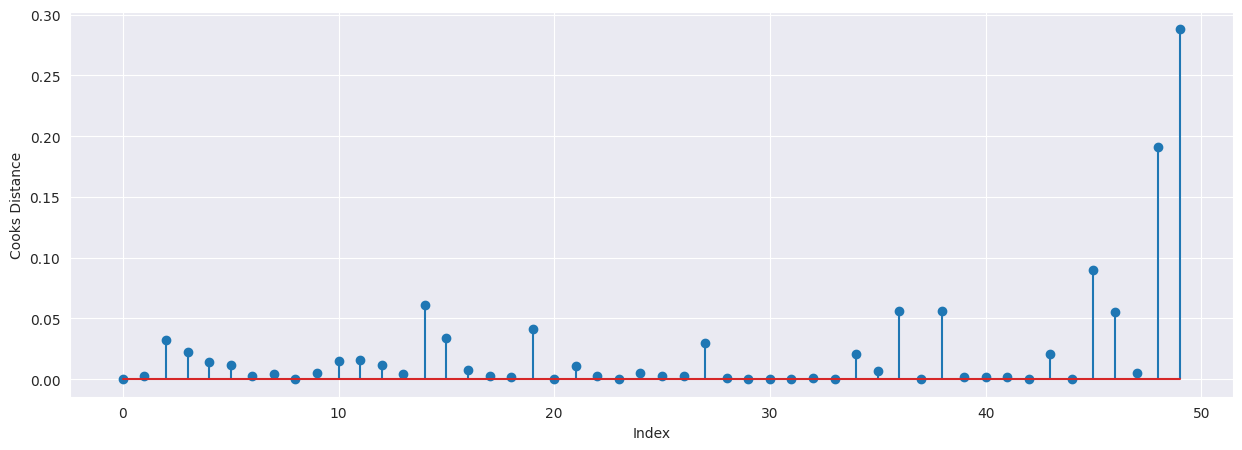

In [39]:
plt.figure(figsize=(15,5))
plt.stem(np.arange(len(d1)), np.round(A, 3))
plt.xlabel('Index')
plt.ylabel('Cooks Distance')
plt.show()

In [40]:
(np.argmax(A),np.max(A))   ## to know where outlier/influencer is present

(49, 0.2880822927543272)

Plotting influencer plot to see outlier presence

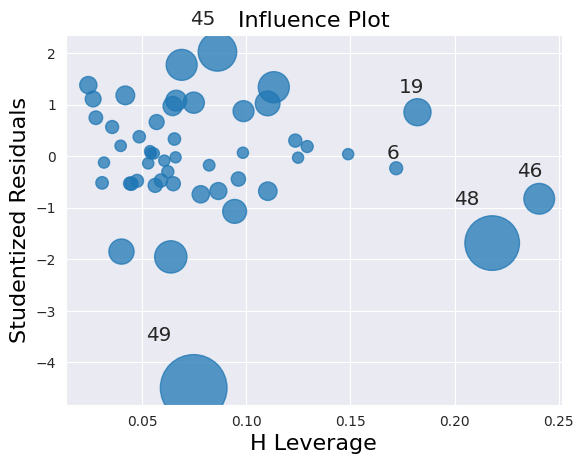

In [41]:
influence_plot(m1)
plt.show()

Calculating leverage value

In [42]:
k=d1.shape[1]
n=d1.shape[0]
LV=3*((k+1)/n)
LV

0.30000000000000004

Dropping the value we obtained above, <-20000 (outlier)

In [44]:
d2=d1.drop(d1.index[[49 ]],axis=0).reset_index()

In [45]:
d2=d2.drop(['index'],axis=1)

In [46]:
d2.shape

(49, 4)

**Model 2**- based on d2 dataset building a model after removing outlier

In [47]:
m2 = smf.ols('Profit~RD+AD+MKT',data=d2).fit()

In [48]:
m2.params

Intercept    52382.439251
RD               0.783002
AD              -0.022201
MKT              0.025234
dtype: float64

In [49]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           8.85e-32
Time:                        08:53:44   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
AD            -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKT            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
pred2=m2.predict(d2)

In [53]:
R2=sqrt(mean_squared_error(pred2,d2.Profit))
R2

7430.589093678352

**Model 3**

As seen in above summary, p-value of Administration and Marketspend is higher than 0.05 except R&D spending. Thus predicting with respect to RD values

In [55]:
m3= smf.ols('Profit~RD',data=d2).fit()

In [56]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           7.56e-34
Time:                        09:01:48   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RD             0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
pred3=m3.predict(d2)

In [58]:
R3=sqrt(mean_squared_error(pred3,d2.Profit))
R3

7803.175973683115

Consolidating all the values

In [59]:
Data=pd.DataFrame({"Model":pd.Series(['m1','m2','m3']),
                   "rsquared":(m1.rsquared,m2.rsquared,m3.rsquared),
                   "AIC":(m1.aic,m2.aic,m3.aic),
                   "rmse":(R1,R2,R3)
                  })

In [60]:
Data

,Model,rsquared,AIC,rmse
0,m1,0.950746,1058.771499,8855.344489
1,m2,0.961316,1020.565297,7430.589094
2,m3,0.957340,1021.360015,7803.175974


From the above data,
Model 2 gave a higher rsquared value, lower Root mean squared error(RMSE). Thus, model 2 is best model to predict a profit.

Even after neglecting AD and MKT values, model 3 didn't improve to give higher r-squared and lower RSME. Therefore, profit of a company won't depend only on research and development(RD), it depends on market spend and administration.